In [9]:
import sys
import os
#os.chdir('E:\ISB work stuff\Post-Doc_BaligaLab_GBMSYGNALProject')
import numpy as np
import pandas as pd
from scipy import stats
from numpy import random as rd
import re
import subprocess
import json
from sklearn.decomposition import PCA
import multiprocessing, multiprocessing.pool
import matplotlib.pyplot as plt
import seaborn as sns
import time,datetime
from collections import Counter
from sklearn.manifold import TSNE
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import tree
import miner
import miner_py3_kk as miner
import imp
imp.reload(miner)
%matplotlib inline
plt.style.use('ggplot')
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

    

resultsDirectory='/Volumes/omics4tb2/SYGNAL/GBM-Serdar/MINER_MicroLowessRNATMM.08.24.2020-test'
if not os.path.isdir(resultsDirectory):
    os.mkdir(resultsDirectory)



2021-11-13 00:02:57


/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWar

Text(0.5, 0, 'Relative expression')

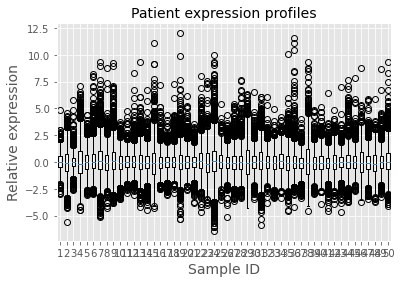

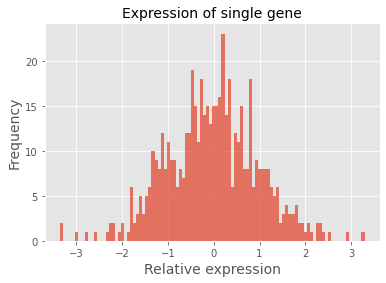

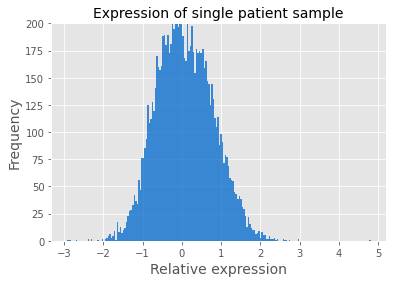

In [11]:
## User defined variables
inputDataFile1= resultsDirectory + '/GbmTCGALowessMicroarrayFilteredWithIDs.csv'
inputDataFile2= resultsDirectory + '/GbmTCGATMMRNASeqFilteredWithGeneIDs.csv'

## Read expression data and conversion table        
expressionData1=pd.read_csv(inputDataFile1,header=0,index_col=0,sep=",")
expressionData2=pd.read_csv(inputDataFile2,header=0,index_col=0,sep=",")
cols_micro = set(expressionData1.columns)
cols_rna = set(expressionData2.columns)
cols_common = list(cols_rna.intersection(cols_micro))
cols_mrnaonly = list(cols_rna.difference(cols_micro))
cols_microonly = list(cols_micro.difference(cols_rna))
expressionData_rna = expressionData2[cols_mrnaonly+cols_common]
expressionData_micro = expressionData1[cols_microonly] 
expressionData = pd.merge(expressionData_rna, expressionData_micro, left_index = True, right_index = True)
expressionData = miner.zscore(expressionData)
expressionData.to_csv(resultsDirectory + "/GbmMicroRNAMergedWithIDsZScored.csv")

inputDataFile_1 = resultsDirectory + "/GBMTCGA_mirna_microarray_Filtered.csv"
expressionData_1=pd.read_csv(inputDataFile_1,header=0,index_col=0,sep=",")
expressionData_miRNA = expressionData_1
cols_miRNAGeneExpCommon = list(expressionData.columns.intersection(expressionData_1.columns))
expressionData_miRNA = expressionData_miRNA[cols_miRNAGeneExpCommon]
expressionData_miRNA = miner.zscore(expressionData_miRNA)
expressionData_miRNA.to_csv(resultsDirectory + "/GbmMicroarrayZScoredmiRNAData.csv")

expressionData_FormiRNA = expressionData[cols_miRNAGeneExpCommon]
expressionData_FormiRNA = pd.concat([expressionData_FormiRNA, expressionData_miRNA])
expressionData_FormiRNA = miner.zscore(expressionData_FormiRNA)
expressionData_FormiRNA.to_csv(resultsDirectory + "/GbmMicroRNAMergedmRNAMicroarraymiRNAZScoredData.csv")
    
individual_expression_data = [expressionData.iloc[:,i] for i in range(50)]
_ = plt.boxplot(individual_expression_data)
plt.title("Patient expression profiles",FontSize=14)
plt.ylabel("Relative expression",FontSize=14)
plt.xlabel("Sample ID",FontSize=14)
plt.figure()
_ = plt.hist(expressionData.iloc[0,:],bins=100,alpha=0.75)
plt.title("Expression of single gene",FontSize=14)
plt.ylabel("Frequency",FontSize=14)
plt.xlabel("Relative expression",FontSize=14)
plt.figure()
_ = plt.hist(expressionData.iloc[:,0],bins=200,color=[0,0.4,0.8],alpha=0.75)
plt.ylim(0,200)
plt.title("Expression of single patient sample",FontSize=14)
plt.ylabel("Frequency",FontSize=14)
plt.xlabel("Relative expression",FontSize=14)

/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
/Users/serdarturkaslan/miniconda3/lib/

Text(0.5, 0, 'Relative expression')

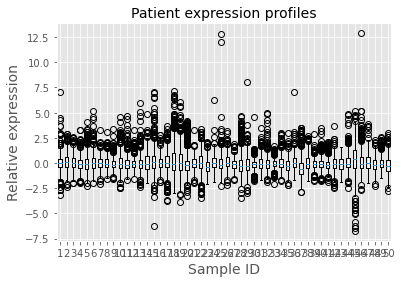

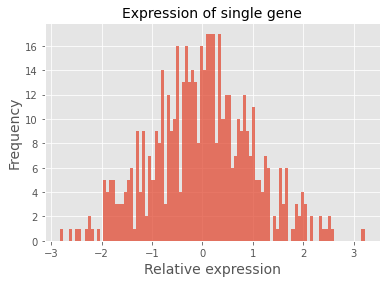

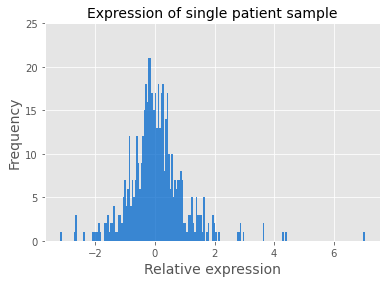

In [12]:
##visualize pre-processed expression data
individual_expression_data = [expressionData_miRNA.iloc[:,i] for i in range(50)]
_ = plt.boxplot(individual_expression_data)
plt.title("Patient expression profiles",FontSize=14)
plt.ylabel("Relative expression",FontSize=14)
plt.xlabel("Sample ID",FontSize=14)
plt.figure()
_ = plt.hist(expressionData_miRNA.iloc[0,:],bins=100,alpha=0.75)
plt.title("Expression of single gene",FontSize=14)
plt.ylabel("Frequency",FontSize=14)
plt.xlabel("Relative expression",FontSize=14)
plt.figure()
_ = plt.hist(expressionData_miRNA.iloc[:,0],bins=200,color=[0,0.4,0.8],alpha=0.75)
plt.ylim(0,25)
plt.title("Expression of single patient sample",FontSize=14)
plt.ylabel("Frequency",FontSize=14)
plt.xlabel("Relative expression",FontSize=14)

/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
/Users/serdarturkaslan/miniconda3/lib/

Text(0.5, 0, 'Relative expression')

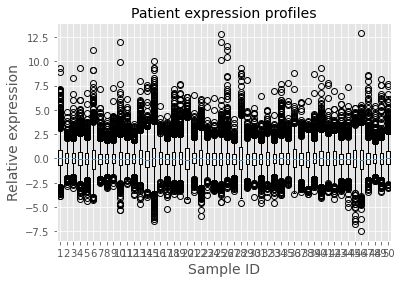

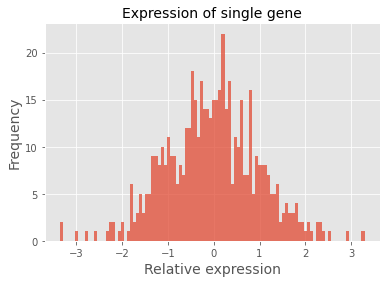

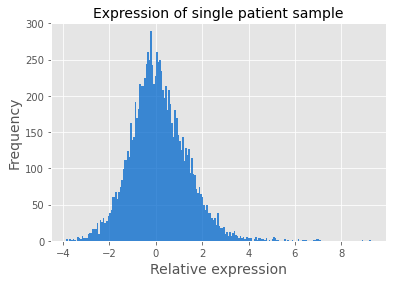

In [13]:
##visualize pre-processed expression data
individual_expression_data = [expressionData_FormiRNA.iloc[:,i] for i in range(50)]
_ = plt.boxplot(individual_expression_data)
plt.title("Patient expression profiles",FontSize=14)
plt.ylabel("Relative expression",FontSize=14)
plt.xlabel("Sample ID",FontSize=14)
plt.figure()
_ = plt.hist(expressionData_FormiRNA.iloc[0,:],bins=100,alpha=0.75)
plt.title("Expression of single gene",FontSize=14)
plt.ylabel("Frequency",FontSize=14)
plt.xlabel("Relative expression",FontSize=14)
plt.figure()
_ = plt.hist(expressionData_FormiRNA.iloc[:,0],bins=200,color=[0,0.4,0.8],alpha=0.75)
plt.ylim(0,300)
plt.title("Expression of single patient sample",FontSize=14)
plt.ylabel("Frequency",FontSize=14)
plt.xlabel("Relative expression",FontSize=14)

# Gene expression clustering

Running cluster function...



  0%|          | 0/5 [00:00<?, ?it/s]

0.00 percent complete
20.00 percent complete
40.00 percent complete
60.00 percent complete
80.00 percent complete

coexpression clustering completed in 1.09 minutes
Completed coexpression clustering in 1.51 minutes
Number of genes clustered: 9048
Number of unique clusters: 637
Completed clustering module in 1.51 minutes


/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWar

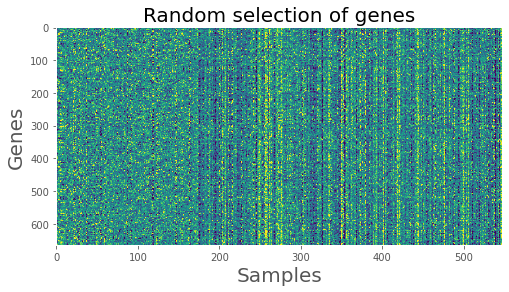

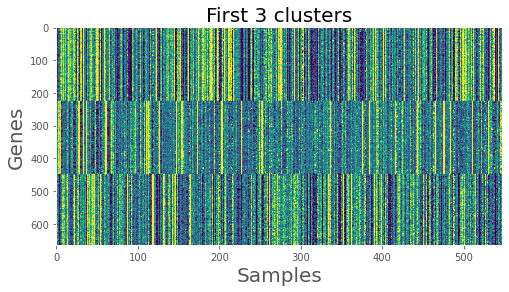

In [14]:
# minimum number of genes that form an acceptable coexpression cluster:
minNumberGenes = 6 #bulk RNAseq default=6;single cell RNAseq default=6

# minimum correlation coefficient for an acceptable regulator-cluster association 
minCorrelation = 0.2 #bulk RNAseq default=0.2;single cell RNAseq default=0.05

# minimum number of genes that form an acceptable coexpression cluster and have share binding site for regulator:
minNumberRegulonGenes = 5 #bulk RNAseq default=5;single cell RNAseq default=4

# choose database: if supplying your own database, use mechanistic_database = reference_mechanistic_database
mechanistic_database = resultsDirectory + "/tfbsdb_tf_to_genes.pkl" #default option
#mechanistic_database = reference_mechanistic_database #use if supplying your own database

# number of cores available for multiprocessing
import multiprocessing
numCores = multiprocessing.cpu_count()

# Network inference may take several minutes. 
# Prompts will print at 0, 20, 40, 60, 80, and 100% complete

t1 = time.time() 
# generate a list of coexpressed gene clusters, all of which have length >= minNumberGenes
initialClusters = miner.cluster(expressionData,minNumberGenes = minNumberGenes,minNumberOverExpSamples=4,maxSamplesExcluded=0.50,random_state=17,overExpressionThreshold=80) 
# revise initialClusters to combine highly correlated clusters and keep only those with significant coexpression
revisedClusters = miner.reviseInitialClusters(initialClusters,expressionData)

# write revisedClusters to .json file
miner.write_json(revisedClusters,os.path.join(resultsDirectory,"coexpressionDictionary.json"))
t2 = time.time()
print("Completed coexpression clustering in {:.2f} minutes".format((t2-t1)/60.))

# retrieve first three clusters for visual inspection
first_clusters = np.hstack([revisedClusters[i] for i in np.arange(3).astype(str)])

# visualize background expression
plt.figure(figsize=(8,4))
plt.imshow(expressionData.loc[np.random.choice(
    expressionData.index,len(first_clusters),
    replace=False),:],aspect="auto",cmap="viridis",vmin=-1,vmax=1)
plt.grid(False)
plt.ylabel("Genes",FontSize=20)
plt.xlabel("Samples",FontSize=20)
plt.title("Random selection of genes",FontSize=20)

# visualize first 10 clusters
plt.figure(figsize=(8,4))
plt.imshow(expressionData.loc[first_clusters,:],aspect="auto",cmap="viridis",vmin=-1,vmax=1)
plt.grid(False)
plt.ylabel("Genes",FontSize=20)
plt.xlabel("Samples",FontSize=20)
plt.title("First 3 clusters",FontSize=20)

# report coverage
print("Number of genes clustered: {:d}".format(len(set(np.hstack(initialClusters)))))
print("Number of unique clusters: {:d}".format(len(revisedClusters)))

t3 = time.time()
print("Completed clustering module in {:.2f} minutes".format((t3-t1)/60.))
#9031, 649

# Mechanistic inference

In [16]:
imp.reload(miner)
t1 = time.time()
# get first principal component axes of clusters
input_path = os.getcwd()
revisedClusters = miner.read_json(os.path.join(resultsDirectory,'coexpressionDictionary.json'))
# minimum number of genes that form an acceptable coexpression cluster and have share binding site for regulator:
minNumberRegulonGenes = 5 #bulk RNAseq default=5;single cell RNAseq default=4

axes = miner.principalDf(revisedClusters,expressionData,subkey=None,minNumberGenes=1)
database_path = os.path.join(resultsDirectory, "tfbsdb_tf_to_genes.pkl")
# minimum correlation coefficient for an acceptable regulator-cluster association 
minCorrelation = 0.2 #bulk RNAseq default=0.2;single cell RNAseq default=0.05
# number of cores available for multiprocessing
import multiprocessing
numCores = multiprocessing.cpu_count()
# analyze revised clusters for enrichment in relational database (default: transcription factor binding site database)
mechanisticOutput = miner.mechanisticInference(axes,revisedClusters,expressionData,correlationThreshold=minCorrelation,numCores=numCores,database=database_path)
# write mechanistic output to .json file
miner.write_json(mechanisticOutput,os.path.join(resultsDirectory,"mechanisticOutput.json"))
# order mechanisticOutput as {tf:{coexpressionModule:genes}} 
coregulationModules = miner.getCoregulationModules(mechanisticOutput)
# write coregulation modules to .json file
miner.write_json(coregulationModules,os.path.join(resultsDirectory,"coregulationModules.json"))
# get final regulons by keeping genes that frequently appear coexpressed and associated to a common regulator
regulons = miner.getRegulons(coregulationModules,minNumberGenes=minNumberRegulonGenes,freqThreshold = 0.333)
# reformat regulon dictionary for consistency with revisedClusters and coexpressionModules
regulonModules, regulonDf = miner.regulonDictionary(regulons)
# write regulonDf to csv using preferred gene name identifiers
regulonDf.to_csv(os.path.join(resultsDirectory,"regulonDf.csv"))
# write regulons to json file
miner.write_json(regulonModules,os.path.join(resultsDirectory,"regulons.json"))
# define coexpression modules as composite of coexpressed regulons
coexpressionModules = miner.getCoexpressionModules(mechanisticOutput)
# write coexpression modules to .json file
miner.write_json(coexpressionModules,os.path.join(resultsDirectory,"coexpressionModules.json"))
# Get eigengenes for all modules
eigengenes = miner.getEigengenes(regulonModules,expressionData,regulon_dict=None,saveFolder=None)
eigenScale = np.percentile(expressionData,95)/np.percentile(eigengenes,95)
eigengenes = eigenScale*eigengenes
eigengenes.index = np.array(eigengenes.index).astype(str)
#write eigengenes to .csv
eigengenes.to_csv(os.path.join(resultsDirectory,"eigengenes.csv"))

t2 = time.time()
print("Completed mechanistic inference in {:.2f} minutes".format((t2-t1)/60.))
print("Inferred network with {:d} regulons, {:d} TF regulators, and {:d} co-regulated genes".format(len(regulonDf.Regulon_ID.unique()),len(regulonDf.Regulator.unique()),len(regulonDf.Gene.unique())))
print("Inferred network with 3764 regulons, 428 TF regulators, and 6781 co-regulated genes")

Running mechanistic inference


/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3_kk.py:1289: RuntimeWarning: invalid value encountered in greater_equal
  tfDict[tfDict_key] = tfs[np.where(np.abs(tfCorrelation)>=correlationThreshold)[0]]


Completed mechanistic inference in 3.28 minutes
Inferred network with 3914 regulons, 421 TF regulators, and 6790 co-regulated genes
Inferred network with 3764 regulons, 428 TF regulators, and 6781 co-regulated genes


# Causal Inference

# Run this only for miRNA inference

In [25]:
imp.reload(miner)
expressionData_FormiRNA = pd.read_csv("GbmMicroRNAMergedmRNAMicroarraymiRNAZScoredData.csv", header = 0, index_col = 0)
regulonDfMicroGbm = pd.read_csv("regulonDfGbmMicroRNAmiRNARegulator.csv", header = 0)
regulonDfMicroGbmlist = list(regulonDfMicroGbm['Regulon_ID'].drop_duplicates())
regulonDfMicroGbmlist = [str(i) for i in regulonDfMicroGbmlist]
regulonDfMicroGbm["Regulon_ID"] = regulonDfMicroGbm["Regulon_ID"].astype(str)
regulonModules = {}
for i in regulonDfMicroGbmlist:
    regulonModules[i]= list(regulonDfMicroGbm[regulonDfMicroGbm['Regulon_ID']==i]['Gene'])
eigengenes = miner.getEigengenes(regulonModules,expressionData_FormiRNA,regulon_dict=None,saveFolder=None)
eigenScale = np.percentile(expressionData_FormiRNA,95)/np.percentile(eigengenes,95)
eigengenes = eigenScale*eigengenes
eigengenes.index = np.array(eigengenes.index).astype(str)
#regulons = {}
#regulatorslist = list(regulonDfMicroGbm['Regulator'].drop_duplicates())
#for i in regulatorslist:
#    temp_regulon_df = regulonDfMicroGbm[regulonDfMicroGbm['Regulator'] == i]
#    regulonslisttemp =  list(temp_regulon_df['Regulon_ID'].drop_duplicates())
#    temp_dict = {}
#    temp_num = 0
#    for j in regulonslisttemp:
#        temp_dict[temp_num]= list(regulonDfMicroGbm[regulonDfMicroGbm['Regulon_ID']==j]['Gene'])
#        temp_num = temp_num + 1
#    regulons[i]= temp_dict
referenceDf = eigengenes.copy()
referenceRegulonDf = regulonDfMicroGbm

In [27]:
imp.reload(miner)
#regulonDfMicroGbm = pd.read_csv("regulonDf.csv", header = 0)
#regulonDfMicroGbmlist = list(regulonDfMicroGbm['Regulon_ID'].drop_duplicates())
#regulonDfMicroGbmlist = [str(i) for i in regulonDfMicroGbmlist]
#regulonDfMicroGbm["Regulon_ID"] = regulonDfMicroGbm["Regulon_ID"].astype(str)
#regulonModules = {}
#for i in regulonDfMicroGbmlist:
#    regulonModules[i]= list(regulonDfMicroGbm[regulonDfMicroGbm['Regulon_ID']==i]['Gene'])
#expressionData = pd.read_csv("GbmMicroRNAMergedWithIDsZScored.csv", header = 0, index_col = 0)
#eigengenes = miner.getEigengenes(regulonModules,expressionData,regulon_dict=None,saveFolder=None)
#eigenScale = np.percentile(expressionData,95)/np.percentile(eigengenes,95)
#eigengenes = eigenScale*eigengenes
#eigengenes.index = np.array(eigengenes.index).astype(str)
#referenceDf = eigengenes.copy()
#referenceRegulonDf = regulonDfMicroGbm

common_mutations_file = os.path.join("mutations.GBM.TCGA.2019.05.01.csv")
common_mutations = pd.read_csv(common_mutations_file,index_col=0,header=0)
mut_matrix = common_mutations.copy()
miner.causalNetworkAnalysis(regulon_matrix=referenceRegulonDf.copy(),expression_matrix=expressionData.copy(),reference_matrix=referenceDf.copy(),mutation_matrix=mut_matrix,resultsDirectory=os.path.join(resultsDirectory,"causal_analysis"),minRegulons=1,significance_threshold=0.05,causalFolder="causal_results_common_mutations")


common_mutations_file = os.path.join("SignificantSomaticMutationsGbmRNAAndMicroarray07242020.csv")
common_mutations = pd.read_csv(common_mutations_file,index_col=0,header=0)
mut_matrix = common_mutations.copy()
miner.causalNetworkAnalysis(regulon_matrix=referenceRegulonDf.copy(),expression_matrix=expressionData.copy(),reference_matrix=referenceDf.copy(),mutation_matrix=mut_matrix,resultsDirectory=os.path.join(resultsDirectory,"causal_analysis"),minRegulons=1,significance_threshold=0.05,causalFolder="causal_results_common_mutations")

common_mutations_file = os.path.join("NonSilentPathwayMutationsGbmRNAAndMicroarray07242020.csv")
common_mutations = pd.read_csv(common_mutations_file,index_col=0,header=0)
mut_matrix = common_mutations.copy()
miner.causalNetworkAnalysis(regulon_matrix=referenceRegulonDf.copy(),expression_matrix=expressionData.copy(),reference_matrix=referenceDf.copy(),mutation_matrix=mut_matrix,resultsDirectory=os.path.join(resultsDirectory,"causal_analysis"),minRegulons=1,significance_threshold=0.05,causalFolder="causal_results_common_mutations")



completed causal analysis in 18.01 minutes
completed causal analysis in 0.70 minutes
completed causal analysis in 1.46 minutes


In [28]:
# compile all causal results
causal_directory = os.path.join(resultsDirectory,"causal_analysis")
causal_results = miner.readCausalFiles(causal_directory)
causal_results.to_csv(os.path.join(resultsDirectory,"completeCausalResults.csv"))
causal_results.head()
# filtered causal results
causal_results_regulon_filtered = causal_results[causal_results["-log10(p)_Regulon_stratification"]>=-np.log10(0.05)]
causal_results_aligned = causal_results_regulon_filtered[causal_results_regulon_filtered.Fraction_of_edges_correctly_aligned>=0.5]
causal_results_aligned_correlated = causal_results_aligned[causal_results_aligned["RegulatorRegulon_Spearman_p-value"]<=0.05]
causal_results_stratified_aligned_correlated = causal_results_aligned_correlated[causal_results_aligned_correlated["-log10(p)_MutationRegulatorEdge"]>=-np.log10(0.05)]

# for all causal flows, 
# the regulon is differentially active w.r.t the mutation,
# the regulator is differentially active w.r.t the mutation,
# the regulator is significantly correlated to the regulon,
# and the directionality of at least half of the differentially active targets 
# downstream of the regulator are consistent with the perturbation from the mutation

causal_results_stratified_aligned_correlated.to_csv(os.path.join(resultsDirectory,"filteredCausalResults.csv"))

# Run this if expression data not same as training data

In [1]:
import miner_py3_kk as miner3
import os
import pandas as pd
#os.chdir('E:\\ISB work stuff\\Post-Doc_BaligaLab_GBMSYGNALProject')

expressionData=pd.read_csv(resultsDirectory + "/GbmMicroRNAMergedmRNAMicroarraymiRNAZScoredData.csv",header=0,index_col=0,sep=",")
#arrayexpdf = miner3.zerofilter(expressionData)     
#expdf = arrayexpdf
#expdf = expdf.fillna(0)
#expdf = miner.removeNullRows(expdf)
#expdf = miner3.entropycheck(expdf)
#expressionData=miner.zscore(expdf)
#expressionData.to_csv("GSE7696_minerInputFiltered.csv")

NameError: name 'resultsDirectory' is not defined

# Run this for an updated regulon set

In [3]:
os.chdir('E:\\ISB work stuff\\Post-Doc_BaligaLab_GBMSYGNALProject')
expressionData_FormiRNA = pd.read_csv("GbmMicroRNAMergedmRNAMicroarraymiRNAZScoredData.csv", header = 0, index_col = 0)
input_path = os.getcwd()
regulonDfMicroGbm = pd.read_csv("regulonDfGbmMicroRNASigCoxAndStatSig.csv", header = 0)
regulonDfMicroGbmlist = list(regulonDfMicroGbm['Regulon_ID'].drop_duplicates())
regulonDfMicroGbmlist = [str(i) for i in regulonDfMicroGbmlist]
regulonDfMicroGbm["Regulon_ID"] = regulonDfMicroGbm["Regulon_ID"].astype(str)
regulonModules = {}
for i in regulonDfMicroGbmlist:
    regulonModules[i]= list(regulonDfMicroGbm[regulonDfMicroGbm['Regulon_ID']==i]['Gene'])
expressionData = expressionData_FormiRNA

# Network Mapping

In [17]:
imp.reload(miner)
t1 = time.time()
# select reference dictionary for downstream analysis (revisedClusters, coexpressionModules, or regulonModules)

referenceDictionary = regulonModules
# create a background matrix used for statistical hypothesis testing
bkgd = miner.backgroundDf(expressionData)
# for each cluster, give samples that show high coherent cluster activity
overExpressedMembers = miner.biclusterMembershipDictionary(referenceDictionary,bkgd,label=2,p=0.05)
# for each clus|ter, give samples that show low coherent cluster activity
underExpressedMembers = miner.biclusterMembershipDictionary(referenceDictionary,bkgd,label=0,p=0.05)
# for each cluster, give samples that do not show coherent cluster activity
dysregulatedMembers = miner.biclusterMembershipDictionary(referenceDictionary,bkgd,label="excluded")
# # for each cluster, give samples that show coherent cluster activity, despite magnitude of expression
coherentMembers = miner.biclusterMembershipDictionary(referenceDictionary,bkgd,label="included")
# write membership matrices to .csv file
overExpressedMembersMatrix = miner.membershipToIncidence(overExpressedMembers,expressionData)
overExpressedMembersMatrix.to_csv(os.path.join(resultsDirectory,"overExpressedMembersmiRNAAndTFRegulonsSig.csv"))
underExpressedMembersMatrix = miner.membershipToIncidence(underExpressedMembers,expressionData)
underExpressedMembersMatrix.to_csv(os.path.join(resultsDirectory,"underExpressedMembersmiRNAAndTFRegulonsSig.csv"))
dysregulatedMembersMatrix = miner.membershipToIncidence(dysregulatedMembers,expressionData)
dysregulatedMembersMatrix.to_csv(os.path.join(resultsDirectory,"dysregulatedMembersmiRNAAndTFRegulonsSig.csv"))
coherentMembersMatrix = miner.membershipToIncidence(coherentMembers,expressionData)
coherentMembersMatrix.to_csv(os.path.join(resultsDirectory,"coherentMembersmiRNAAndTFRegulonsSig.csv"))

t2 = time.time()
print("Completed patient mapping in {:.2f} minutes".format((t2-t1)/60.))

biclusterMembershipDictionary is done!
biclusterMembershipDictionary is done!
Completed Bicluster Membership dictionary for excluded. done!
Completed Bicluster Membership dictionary for included. done!
Completed patient mapping in 1.40 minutes


/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


Text(0.5, 0, 'Samples')

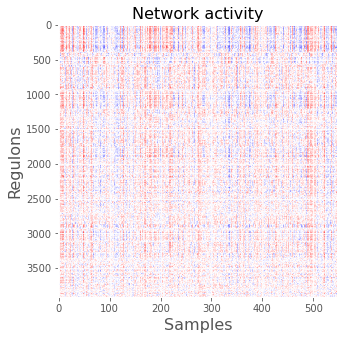

In [18]:
#visualize network activity across individual samples
plt.figure(figsize=(5,5))
network_activity_heatmap = overExpressedMembersMatrix-underExpressedMembersMatrix
plt.imshow(network_activity_heatmap,cmap="bwr",vmin=-1,vmax=1,aspect="auto")
plt.title("Network activity",FontSize=16)
plt.ylabel("Regulons",FontSize=16)
plt.xlabel("Samples",FontSize=16)

# Infer patient sub-types

In [20]:
# Infer transcriptional states
imp.reload(miner)
minClusterSize = int(np.ceil(0.01*expressionData.shape[1]))
referenceMatrix = overExpressedMembersMatrix-underExpressedMembersMatrix
primaryMatrix = overExpressedMembersMatrix
primaryDictionary = overExpressedMembers
secondaryMatrix = underExpressedMembersMatrix
secondaryDictionary = underExpressedMembers

states, centroidClusters = miner.inferSubtypes(referenceMatrix,primaryMatrix,secondaryMatrix,primaryDictionary,secondaryDictionary,minClusterSize = int(np.ceil(0.01*expressionData.shape[1])),restricted_index=None)
states_dictionary = {str(i):states[i] for i in range(len(states))}
print(states_dictionary)
miner.write_json(states_dictionary,os.path.join(resultsDirectory,"transcriptional_statesmiRNAAndTFSig.json"))

Beginning subtype inference
completed subtype inference in 0.29 minutes
{'0': ['TCGA-06-0210.1', 'TCGA-06-0125.1', 'TCGA-19-4065.1', 'TCGA-06-0190.1', 'TCGA-06-5414', 'TCGA-28-1753', 'TCGA-28-5218', 'TCGA-06-0130', 'TCGA-27-1832', 'TCGA-06-5418', 'TCGA-14-0789', 'TCGA-06-0646', 'TCGA-28-2509', 'TCGA-06-0152', 'TCGA-12-0619', 'TCGA-27-1830', 'TCGA-27-2519', 'TCGA-06-2562', 'TCGA-32-2615', 'TCGA-76-4928', 'TCGA-06-2561', 'TCGA-06-0171', 'TCGA-06-0210', 'TCGA-14-1034', 'TCGA-32-2638', 'TCGA-06-0649', 'TCGA-06-0187', 'TCGA-26-5139', 'TCGA-41-3915', 'TCGA-16-1045', 'TCGA-06-2569', 'TCGA-06-0156', 'TCGA-06-0878', 'TCGA-32-1977', 'TCGA-06-0192', 'TCGA-14-1794', 'TCGA-28-1760', 'TCGA-16-1055', 'TCGA-02-0052', 'TCGA-19-5952', 'TCGA-76-6193', 'TCGA-06-1086', 'TCGA-32-1987', 'TCGA-02-0003', 'TCGA-12-1096', 'TCGA-02-0060', 'TCGA-08-0521', 'TCGA-08-0352', 'TCGA-08-0373', 'TCGA-12-0772', 'TCGA-26-1439', 'TCGA-12-1088', 'TCGA-08-0356', 'TCGA-06-0176', 'TCGA-02-0034', 'TCGA-12-0827', 'TCGA-28-1750', '

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/omics4tb2/SYGNAL/GBM-Serdar/MINER_MicroLowessRNATMM.08.24.2020-test/transcriptional_statesmiRNAAndTFSig.json'

# Transcriptional programs - Only for training data

/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3_kk.py:2038: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel("Regulons",FontSize=14)
/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3_kk.py:2039: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel("Samples",FontSize=14)


{'0': ['7', '11', '12', '29', '73', '90', '95', '104', '119', '129', '148', '172', '174', '177', '201', '265', '290', '291', '304', '309', '311', '314', '326', '341', '401', '402', '420', '518', '610', '631', '698', '702', '721', '724', '799', '836', '885', '899', '905', '985', '986', '995', '1023', '1027', '1028', '1048', '1076', '1108', '1152', '1173', '1183', '1198', '1215', '1221', '1266', '1274', '1364', '1365', '1395', '1403', '1417', '1418', '1478', '1545', '1558', '1615', '1621', '1622', '1671', '1714', '1752', '1776', '1790', '1809', '1812', '1828', '1835', '1867', '1868', '1885', '1901', '1931', '1942', '1957', '2037', '2045', '2146', '2150', '2190', '2222', '2332', '2338', '2420', '2483', '2508', '2634', '2722', '2734', '2753', '2772', '2784', '2785', '2883', '2892', '2907', '2952', '2974', '2980', '2984', '3009', '3098', '3138', '3144', '3150', '3273', '3280', '3285', '3291', '3305', '3331', '3494', '3495', '3531', '3543', '3569', '3635', '3641', '3665', '3675', '3677', '36

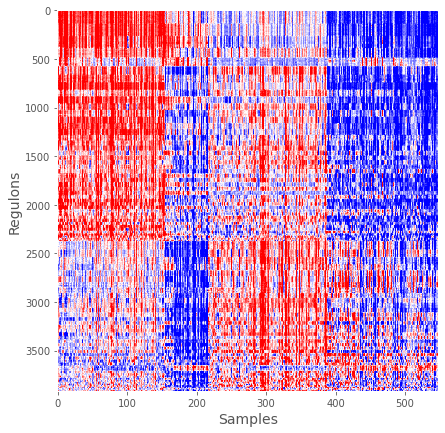

In [22]:
# Infer transcriptional programs
# Get eigengenes for all modules
eigengenes = miner.getEigengenes(regulonModules,expressionData,regulon_dict=None,saveFolder=None)
eigenScale = np.percentile(expressionData,95)/np.percentile(eigengenes,95)
eigengenes = eigenScale*eigengenes
eigengenes.index = np.array(eigengenes.index).astype(str)
reference_df = eigengenes.copy()
eigengenes.to_csv(os.path.join(resultsDirectory,"eigengenesmiRNAAndTFSig.csv"))
programs, _ = miner.mosaic(dfr=reference_df,clusterList=centroidClusters,minClusterSize_x=int(np.ceil(0.01*expressionData.shape[1])),minClusterSize_y=5,allow_singletons=False,max_groups=50,saveFile=os.path.join(resultsDirectory,"regulon_activity_heatmapmiRNAAndTFSig.pdf"),random_state=12)   
transcriptional_programs, program_regulons = miner.transcriptionalPrograms(programs,referenceDictionary)
program_list = [program_regulons[("").join(["TP",str(i)])] for i in range(len(program_regulons))]
programs_dictionary = {str(i):program_list[i] for i in range(len(program_list))}
miner.write_json(programs_dictionary,os.path.join(resultsDirectory,"transcriptional_programsmiRNAAndSig.json"))
print(programs_dictionary)
mosaicDf = reference_df.loc[np.hstack(program_list),np.hstack(states)]
mosaicDf.to_csv(os.path.join(resultsDirectory,"regulons_activity_heatmapmiRNAAndTFSig.csv"))
pr_genes = {}
pr_regulons = {}
for i in range(len(program_list)):
    rgns = program_list[i]
    genes = []
    for r in rgns:
        genes.append(regulonModules[r])
    genes = list(set(np.hstack(genes)))
    pr_genes[i] = genes
    pr_regulons[i] = rgns
#print(pd.DataFrame.from_dict(pr_genes, orient='index'))
programdf = pd.DataFrame.from_dict(pr_genes, orient='index')
programdf = programdf.stack().reset_index()
programdf = programdf.iloc[:,[0,2]]
programdf.columns = ['Programs','Genes']
programdf.to_csv(os.path.join(resultsDirectory,"programDfmiRNAAndTFSig.csv"))
programdf = pd.DataFrame.from_dict(pr_regulons, orient='index')
programdf = programdf.stack().reset_index()
programdf1 = programdf.iloc[:,[0,2]]
programdf1.columns = ['Programs','Regulons']
programdf1.to_csv(os.path.join(resultsDirectory,"programDfmiRNAAndTFSigRegulons.csv"))


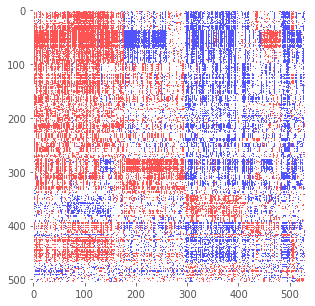

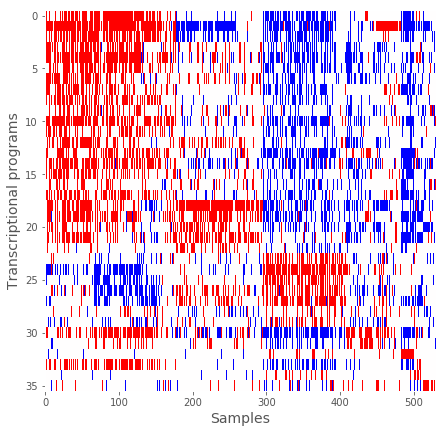

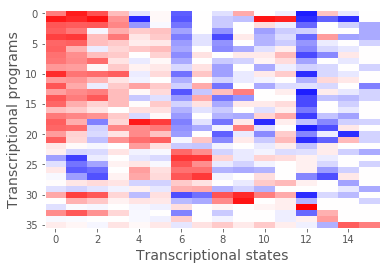

In [8]:
import imp
import miner
imp.reload(miner)
input_path = os.getcwd()
#transcriptional_programs = miner.read_json(os.path.join(input_path,'GBM\\results\\MINER\\MINER_MicroLowessRNATMM.08.24.2020\\transcriptional_programs.json'))
#program_list = [transcriptional_programs[str(key)] for key in range(len(transcriptional_programs.keys()))]

dfr = overExpressedMembersMatrix-underExpressedMembersMatrix
mtrx = dfr.loc[np.hstack(program_list),np.hstack(states)]
plt.figure(figsize=(5,5))
plt.imshow(mtrx,cmap="bwr",vmin=-1.5,vmax=1.5,aspect=float(mtrx.shape[1])/float(mtrx.shape[0]))
plt.grid(False)
plt.savefig(os.path.join(resultsDirectory,"mosaic_allTFAndmiRNASig.pdf"),bbox_inches="tight")
# Determine activity of transcriptional programs in each sample
statesDf = miner.reduceModules(df=dfr.loc[np.hstack(program_list),np.hstack(states)],programs=program_list,states=states,stateThreshold=0.50,saveFile=os.path.join(resultsDirectory,"transcriptional_programsTFAndmiRNASig.pdf"))

# Cluster patients into subtypes and give the activity of each program in each subtype
programsVsStates = miner.programsVsStates(statesDf,states,filename=os.path.join(resultsDirectory,"programs_vs_statesTFAndmiRNASig.pdf"),showplot=True)

         TS1       TS2       TS3       TS4       TS5       TS6       TS7  \
0   0.507463  0.888889  0.678571  0.263158 -0.105882  0.029412 -0.631068   
1   0.895522  0.841270  0.928571  0.421053 -0.847059  0.029412 -0.660194   
2   0.656716  0.634921  0.642857  0.473684 -0.400000 -0.029412 -0.543689   
3   0.626866  0.523810 -0.035714  0.315789  0.200000  0.235294 -0.359223   
4   0.746269  0.777778  0.250000  0.526316  0.094118  0.205882 -0.514563   
5   0.597015  0.619048  0.250000  0.210526  0.070588  0.088235 -0.388350   
6   0.611940  0.301587 -0.071429  0.157895  0.211765  0.264706 -0.339806   
7   0.552239  0.444444  0.250000  0.210526  0.000000  0.176471 -0.446602   
8   0.537313  0.460317  0.571429  0.105263 -0.082353  0.029412 -0.330097   
9   0.402985  0.380952  0.035714  0.210526  0.047059  0.088235 -0.155340   
10  0.820896  0.539683  0.571429  0.631579 -0.070588  0.147059 -0.553398   
11  0.388060  0.412698  0.285714  0.105263 -0.047059  0.000000 -0.310680   
12  0.656716

Text(0.5,0,'Transcriptional states')

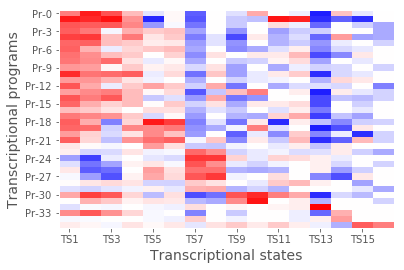

In [10]:
programsVsStates.columns = ['TS1','TS2','TS3','TS4','TS5','TS6','TS7','TS8','TS9','TS10','TS11','TS12','TS13','TS14','TS15','TS16']
print(programsVsStates)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(programsVsStates,cmap="bwr",vmin=-1,vmax=1,aspect="auto")
ax.set_xticks(np.arange(0, programsVsStates.shape[1], 2))
ax.set_xticklabels(['TS1','TS3','TS5','TS7','TS9','TS11','TS13','TS15','TS17'])
ax.set_yticks(np.arange(0, programsVsStates.shape[0], 3))
ax.set_yticklabels(['Pr-0','Pr-3','Pr-6','Pr-9','Pr-12','Pr-15','Pr-18','Pr-21','Pr-24','Pr-27','Pr-30', 'Pr-33', 'Pr-34', 'Pr-35'])
ax.grid(False)
plt.ylabel("Transcriptional programs",FontSize=14)
plt.xlabel("Transcriptional states",FontSize=14)